### Import python packages

In [10]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sns

### Take a look at influencer dataset in fashion category

In [11]:
influencer_df = pd.read_csv('fashion_influencer.csv', index_col=0) # The path that contains all fashion influencers information
influencer_df = influencer_df.rename(columns={"Sponser": "sponsor"})

In [12]:
influencer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638741 entries, 0 to 657891
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Username     638741 non-null  object 
 1   sponsor      638741 non-null  int64  
 2   json_file    638741 non-null  object 
 3   image_files  638741 non-null  object 
 4   #Followers   638741 non-null  float64
 5   #Followees   638741 non-null  float64
 6   #Posts       638741 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 39.0+ MB


In [13]:
print("There are \'", influencer_df['Username'].nunique(), "\' influencers in the dataset")

There are ' 9290 ' influencers in the dataset


In [14]:
sponsor_post = influencer_df[['Username', 'sponsor']]
print(sponsor_post['sponsor'].value_counts())
print('non-sponsored posts ratio', sponsor_post['sponsor'].value_counts()[0]/influencer_df.shape[0])
print('sponsored posts ratio', sponsor_post['sponsor'].value_counts()[1]/influencer_df.shape[0])

0    550050
1     88691
Name: sponsor, dtype: int64
non-sponsored posts ratio 0.8611471629345854
sponsored posts ratio 0.13885283706541462


In [15]:
sponsor_info = sponsor_post.groupby('Username')['sponsor'].value_counts().unstack(fill_value=0).reset_index()
sponsor_info = sponsor_info.rename(columns={0: 'non-sponsored', 1: 'sponsored'})
sponsor_info['percentage_of_sponsored'] = sponsor_info['sponsored']/(sponsor_info['non-sponsored']+sponsor_info['sponsored'])
nonsponsor_li = sponsor_info[sponsor_info['percentage_of_sponsored']==0]['Username'].tolist()
print("There are", len(nonsponsor_li), "users have no sponsored posts in our dataset:\n", nonsponsor_li)

There are 1011 users have no sponsored posts in our dataset:
 ['___noangel', '__limimi', '__niki22', '_lady.ruby_', '_lisang_', '_marinakamura_', '_martinarao_', '_maylen__', '_mihirjariwala_', '_millyna_', '_mr.gin_', '_taamiferreira', '_wildwobs', 'bestofmenstyle', 'bryanaholly', 'clothedinfaith', 'dailyfrontrow', 'dushanmilenkovich', 'elinakui', 'ellatumbless', 'elsaasiah', 'em_cullum', 'empemb', 'ericel', 'erika_n.c.r', 'eveningstandardmagazine', 'fashionista.sho', 'fifteenminfame', 'flogismondi', 'fluffileinalice', 'franniballecter', 'funkyflairboutique', 'gabrielahansolo', 'ginevralambruschi', 'glamour_doll', 'habesha_hottie', 'hannahruthsison', 'healthy_mandy', 'helenacueva', 'helenayerza', 'hello.hosnah', 'hellograciemae', 'henriquessillva', 'herzueberkopf', 'heycnyn', 'highhatgirls', 'hjsouthwood', 'hookedontilly', 'houseoftrends', 'hpluxe', 'http.edro', 'hugrunegils', 'hushglossstile', 'iambeniada', 'iamcesarin', 'iamjorgeluis_', 'iamlizacole', 'iammelody.mp', 'iammroyal', 'i

[Text(0.5, 0, 'Percentage of Sponsored Posts'),
 Text(0.5, 1.0, 'Distribution of Sponsored Post Ratio')]

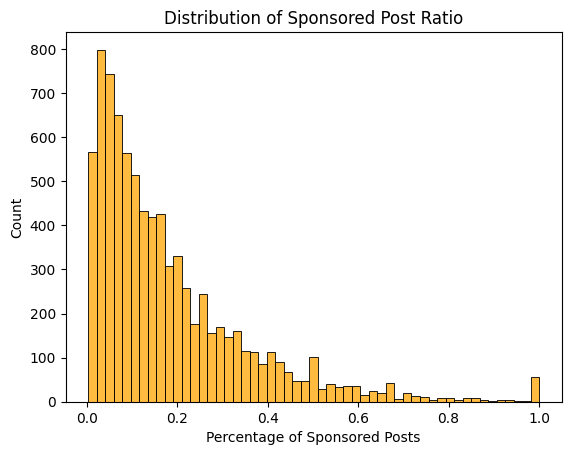

In [16]:
# Exclude those users with no sponsored post in our dataset
sponsor_user = sponsor_info[sponsor_info['percentage_of_sponsored']>0]
ax = sns.histplot(sponsor_user, x = 'percentage_of_sponsored', color="orange")

ax.set(xlabel='Percentage of Sponsored Posts',
       title='Distribution of Sponsored Post Ratio')

# plt.savefig("viz/sponsored_post_ratio.png", format="png")

In [17]:
# Extract posts from users that have sponsored post from the post_df
sponsor_influencer = influencer_df[~influencer_df['Username'].isin(nonsponsor_li)]
sponsor_influencer.shape

(605963, 7)

### Take a look at post data

In [18]:
post_df = pd.read_csv("post_df.csv") # The path that contains all post metadata

### Merge influencer and post dataframe, calculate engagement rate (ER), our target feature
#### ER = (#likes + #comments) / #followers

In [19]:
merged = pd.merge(left=post_df, right=sponsor_influencer, left_on='json', right_on='json_file')
merged['ER'] = (merged['likes'] + merged['comments'])/merged['#Followers']
merged.head()

,json,post_timestamp,likes,comments,edge_media_to_comment,edge_media_to_sponsor_user,edge_media_to_tagged_user,hashtags,hashtag_count,caption,Username,sponsor,json_file,image_files,#Followers,#Followees,#Posts,ER
0,1778527492682732179.json,1526237020,172,11,NaN,NaN,NaN,"['liketkit', 'LTKunder50', 'LTKstyletip']",3,These sunnies are going to be my summer favs! ...,layersnlipstick,0,1778527492682732179.json,['1778527492682732179.jpg'],3105.0,4194.0,1652.0,0.058937
1,1944636038815427244.json,1546038702,259,6,"[{'node': {'created_at': 1546040209, 'did_repo...",{'edges': []},{'edges': [{'node': {'user': {'full_name': 'Av...,"['avawomen', 'avapartner', 'avabracelet']",3,It’s crazy how much more in tune with body I’v...,madison_silotti,0,1944636038815427244.json,"['1944636033388133616.jpg', '19446360333881826...",4937.0,1206.0,805.0,0.053676
2,1919337317395337083.json,1543022859,3191,39,NaN,NaN,NaN,"['OnAnyStage', 'FunInLine', 'BoHugglesworth', ...",10,Hi sweet friends! Currently enjoying our Chris...,mrs.rebeccarobinson,0,1919337317395337083.json,['1919337317395337083.jpg'],83376.0,3756.0,1468.0,0.038740
3,1973686443494832201.json,1549501780,3217,69,NaN,NaN,NaN,"['liketkit', 'fpme', 'flatlay', 'myrm', 'quay'...",7,Bralette and shorts kinda day ☀️🌞 soaking up t...,thehouseofsequins,0,1973686443494832201.json,['1973686443494832201.jpg'],225990.0,243.0,2451.0,0.014540
4,1687821871570856682.json,1515424067,1268,88,NaN,NaN,NaN,"['HealthyGlowingSkinForLife', 'DermalogicaUK',...",5,Love my makeup today 😍 and got my new extensio...,scoynex,0,1687821871570856682.json,['1687821871570856682.jpg'],34957.0,1588.0,799.0,0.038791


In [20]:
# Check data types and missing values
print(merged.info())

# Descriptive statistics for numerical columns
print(merged.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392854 entries, 0 to 392853
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   json                        392854 non-null  object 
 1   post_timestamp              392854 non-null  int64  
 2   likes                       392854 non-null  int64  
 3   comments                    392854 non-null  int64  
 4   edge_media_to_comment       60967 non-null   object 
 5   edge_media_to_sponsor_user  60967 non-null   object 
 6   edge_media_to_tagged_user   60967 non-null   object 
 7   hashtags                    392854 non-null  object 
 8   hashtag_count               392854 non-null  int64  
 9   caption                     391650 non-null  object 
 10  Username                    392854 non-null  object 
 11  sponsor                     392854 non-null  int64  
 12  json_file                   392854 non-null  object 
 13  image_files   

### Detect outliers in ER

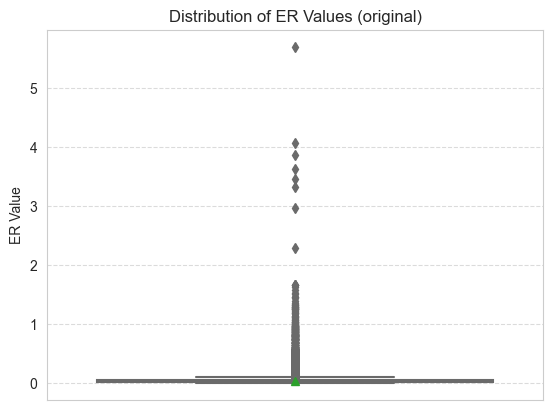

In [21]:
# Assuming your DataFrame is named 'df_'
sns.set_style("whitegrid")  # Set a background grid for better readability

sns.boxplot(
    y="ER",
    data=merged,
    showmeans=True,  # Show the mean as a marker within the box
    palette="Set3",  # Use a color palette from available options (check Seaborn documentation)
)

plt.title("Distribution of ER Values (original)")
plt.ylabel("ER Value")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a dashed grid on the y-axis

# plt.savefig("viz/distribution_ER(org).png", format="png")

# Display the plot
plt.show()

In [22]:
print('outliers:')
print(merged[merged['ER']>2].sort_values('ER', ascending=False))
# remove outliers
df = merged[merged['ER']<2]

outliers:
                            json  post_timestamp   likes  comments  \
287800  2004271399983711731.json      1553147791   16156         5   
109838  1978686339387173342.json      1550097814  185413       313   
245809  2015597700411300611.json      1554497991    4640        44   
267347  1738077857361866546.json      1521415048   50076       207   
329724  1974371433720432329.json      1549583437  157109       241   
132950  1959765183220327332.json      1547842236  111001       139   
199801  1974958253431562191.json      1549653392  121265       776   
55648   1968339587696702285.json      1548864385   32529       437   

                                    edge_media_to_comment  \
287800                                                NaN   
109838                                                NaN   
245809  [{'node': {'created_at': 1554507338, 'did_repo...   
267347                                                NaN   
329724                                                

In [23]:
print('ER=0:')
print(df[df['ER']==0])
# remove outliers
df = df[df['ER']>0]

ER=0:
                            json  post_timestamp  likes  comments  \
67999   1862089139383862797.json      1536198345      0         0   
132541  2008433647966794706.json      1553643970      0         0   

       edge_media_to_comment edge_media_to_sponsor_user  \
67999                    NaN                        NaN   
132541                   NaN                        NaN   

       edge_media_to_tagged_user  \
67999                        NaN   
132541                       NaN   

                                                 hashtags  hashtag_count  \
67999   ['liketkit', 'LTKitbag', 'LTKsalealert', 'LTKs...             12   
132541                       ['prideandprejudiceatlanta']              1   

                                                  caption      Username  \
67999   Happy Hump Day! I can’t believe the week is al...  styledinblue   
132541  I'm the Happiest Person in the World Right now...  latricesohot   

        sponsor                 json_file   

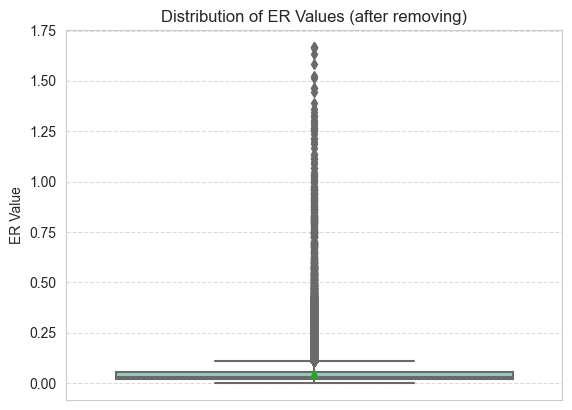

In [24]:
# Assuming your DataFrame is named 'df_'
sns.set_style("whitegrid")  # Set a background grid for better readability

sns.boxplot(
    y="ER",
    data=df,
    showmeans=True,  # Show the mean as a marker within the box
    palette="Set3",  # Use a color palette from available options (check Seaborn documentation)
)

plt.title("Distribution of ER Values (after removing)")
plt.ylabel("ER Value")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add a dashed grid on the y-axis

# plt.savefig("viz/distribution_ER(aft).png", format="png")

# Display the plot
plt.show()

### Add time features and analize them

In [25]:
# Convert timestamp to datetime
df['post_timestamp'] = df['post_timestamp'].apply(lambda d:dt.datetime.fromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S'))
df['post_timestamp'] = pd.to_datetime(df['post_timestamp'])

# Extract year, month, day, hour
df['year'] = df['post_timestamp'].dt.year
df['month'] = df['post_timestamp'].dt.month
df['day'] = df['post_timestamp'].dt.day
df['hour'] = df['post_timestamp'].dt.hour

df['weekday'] = df['post_timestamp'].dt.weekday+1

### Exploratory data analysis and visualization

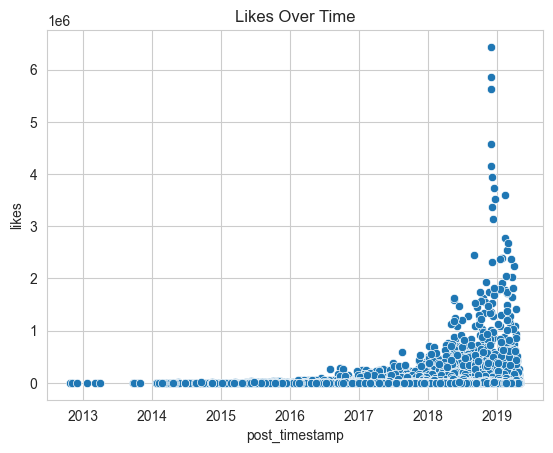

In [26]:
# Time series plot
sns.scatterplot(x='post_timestamp', y='likes', data=df)
plt.title('Likes Over Time')
plt.grid(True)
plt.show()

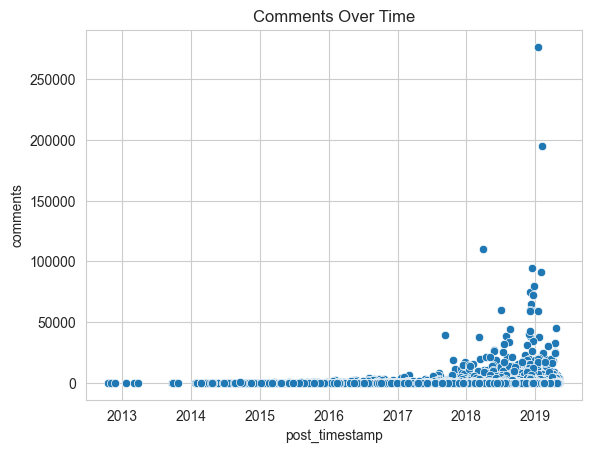

In [27]:
# Time series plot
sns.scatterplot(x='post_timestamp', y='comments', data=df)
plt.title('Comments Over Time')
plt.grid(True)
plt.show()

/var/folders/c_/6jt_vlf55f91p67q18x96hlr0000gn/T/ipykernel_73873/1153683887.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='post_timestamp', y='ER', data=df, palette="Set2")


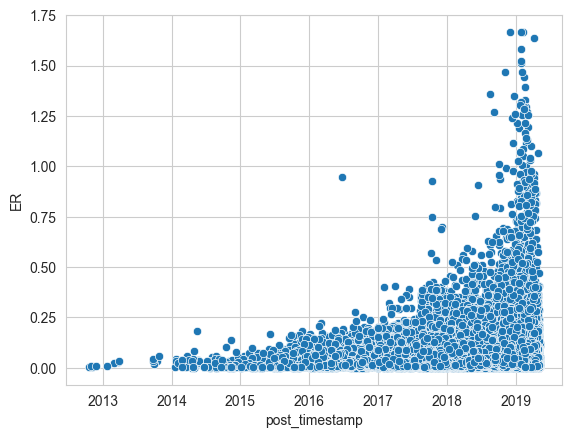

In [28]:
# Time series plot
sns.scatterplot(x='post_timestamp', y='ER', data=df, palette="Set2")
plt.grid(True)

# plt.savefig('viz/ER_over_time.png', format="png")
plt.show()

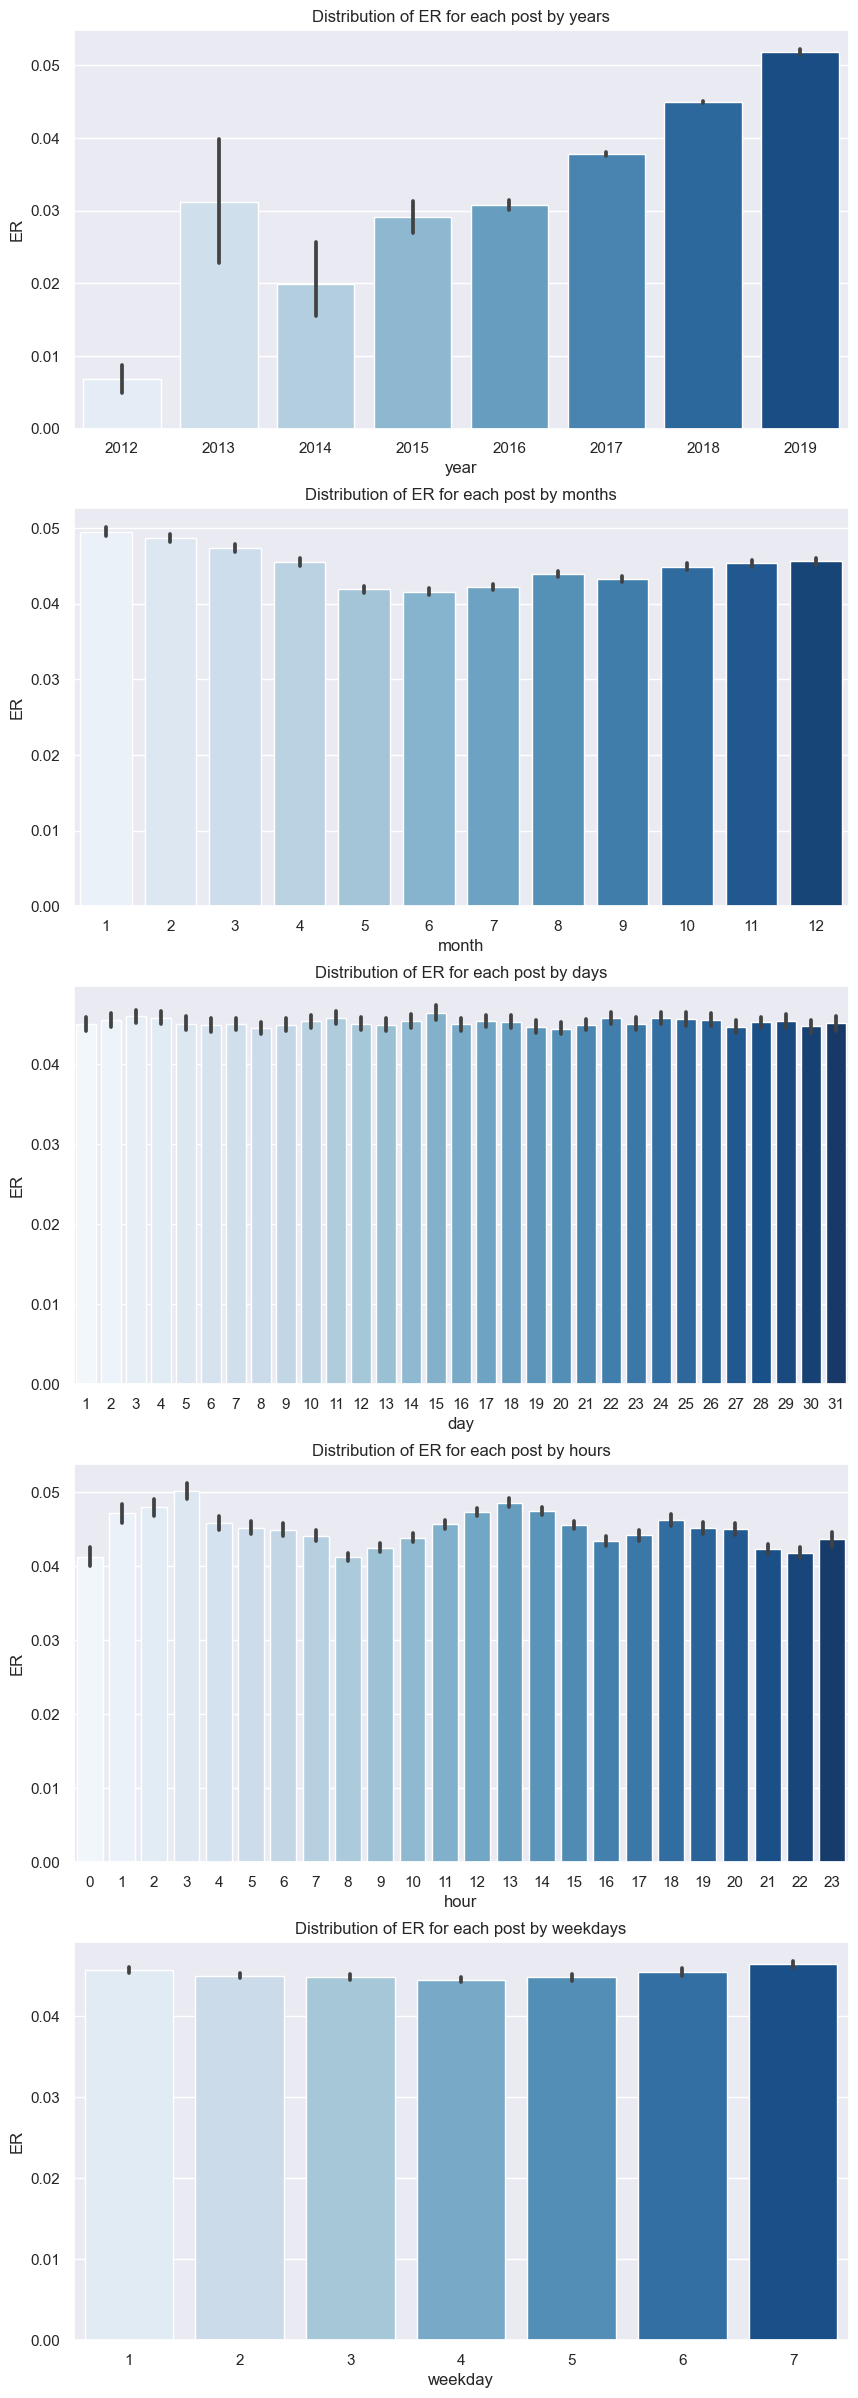

In [29]:
sns.set(font_scale=1)

fig, ax = plt.subplots(5, 1, figsize=(10, 5*6))

sns.barplot(x=df.year, y=df.ER, ax=ax[0], palette='Blues')
ax[0].title.set_text('Distribution of ER for each post by years')

sns.barplot(x=df.month, y=df.ER, ax=ax[1], palette='Blues')
ax[1].title.set_text('Distribution of ER for each post by months')

sns.barplot(x=df.day, y=df.ER, ax=ax[2], palette='Blues')
ax[2].title.set_text('Distribution of ER for each post by days')

sns.barplot(x=df.hour, y=df.ER, ax=ax[3], palette='Blues')
ax[3].title.set_text('Distribution of ER for each post by hours')

sns.barplot(x=df.weekday, y=df.ER, ax=ax[4], palette='Blues')
ax[4].title.set_text('Distribution of ER for each post by weekdays')


plt.show()

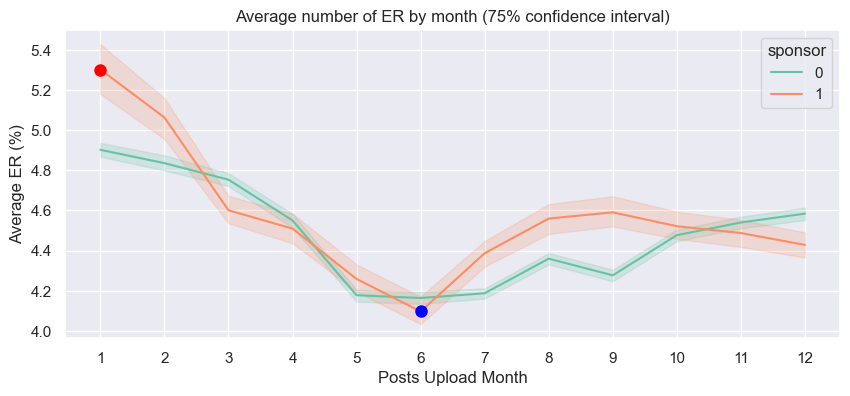

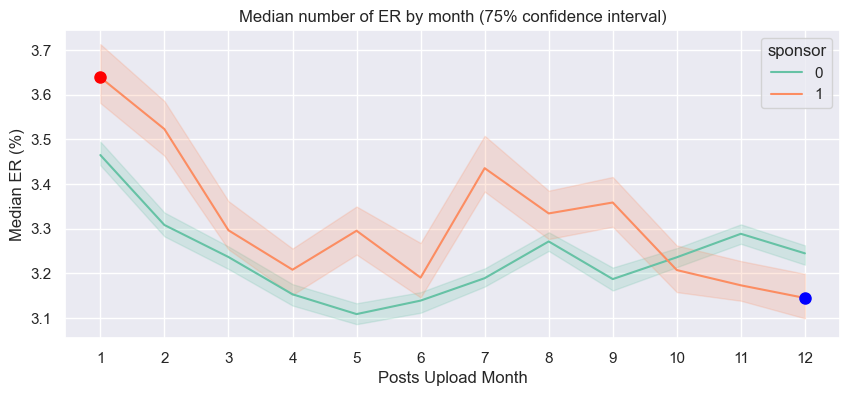

In [30]:
def plot_agg_simple(agg_name="Average", agg_function=np.mean, ci = 75):

    plt.figure(figsize=(10, 4))

    df_er = df.copy()
    df_er['ER'] = 100*df_er['ER']
    ax = sns.lineplot(data=df_er, x='month', y='ER', estimator=agg_function, errorbar=('ci', ci), hue='sponsor', palette="Set2")

    frame = df_er[df_er['sponsor']==1].groupby('month')['ER'].apply(agg_function)

    plt.plot(frame.argmax()+1, frame.max(), color='red', markersize=8, marker='o')
    plt.plot(frame.argmin()+1, frame.min(), color='blue', markersize=8, marker='o')

    ax.set(xlabel='Posts Upload Month',
       ylabel=f'{agg_name} ER (%)',
       title=f'{agg_name} number of ER by month ({ci}% confidence interval)',
       xticks = range(1, 13)
    )

    # plt.savefig(f"viz/{agg_name}_ER_month.png", format="png")

    plt.show()

plot_agg_simple(agg_name="Average", agg_function=np.mean, ci=75)
plot_agg_simple(agg_name="Median", agg_function=np.median, ci=75)

In [31]:
def get_season(month):
  """
  This function takes a month number (1-12) and returns the corresponding season.
  """
  if month in [3, 4, 5]:
    return "Spring"
  elif month in [6, 7, 8]:
    return "Summer"
  elif month in [9, 10, 11]:
    return "Fall"
  else:
    return "Winter"

df['season'] = df['month'].apply(get_season)

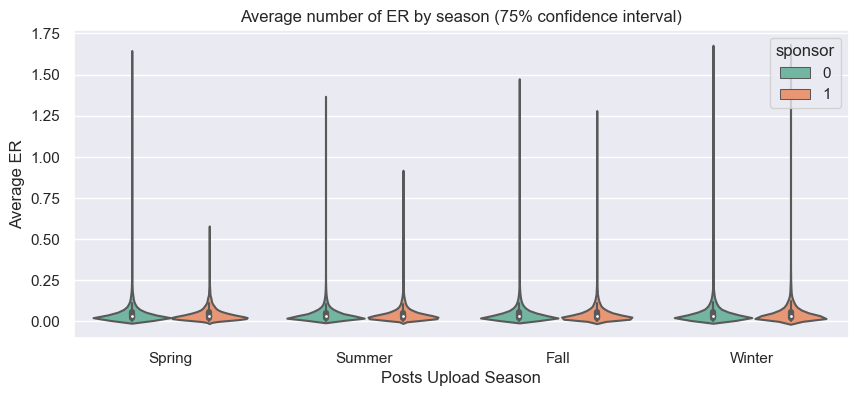

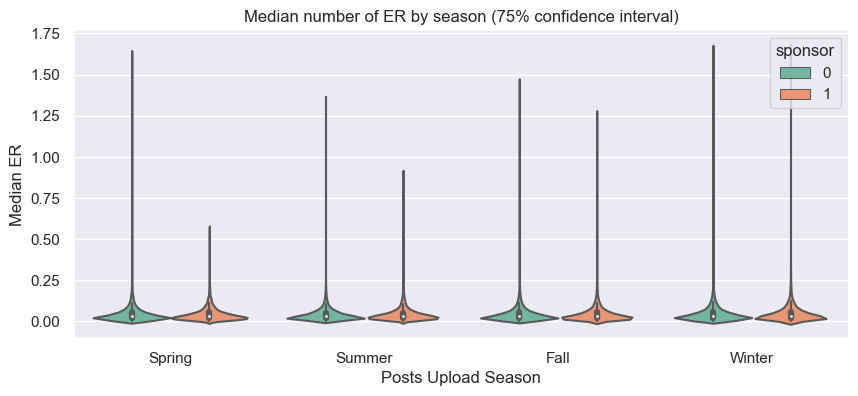

In [32]:
def plot_agg_simple(agg_name="Average", agg_function=np.mean, ci = 75):
    
    plt.figure(figsize=(10, 4))

    ax = sns.violinplot(x="season", y="ER", hue="sponsor", showmeans=True, data=df, palette="Set2",  order=["Spring", "Summer", "Fall", "Winter"])
    ax.set(xlabel='Posts Upload Season',
       ylabel=f'{agg_name} ER',
       title=f'{agg_name} number of ER by season ({ci}% confidence interval)'
    )
    # plt.savefig(f"viz/{agg_name}_ER_season.png", format="png")

    plt.show()

plot_agg_simple(agg_name="Average", agg_function=np.mean, ci=75)
plot_agg_simple(agg_name="Median", agg_function=np.median, ci=75)

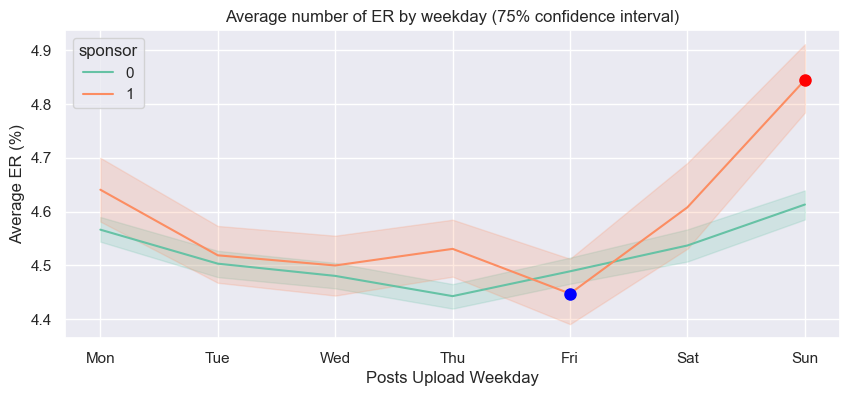

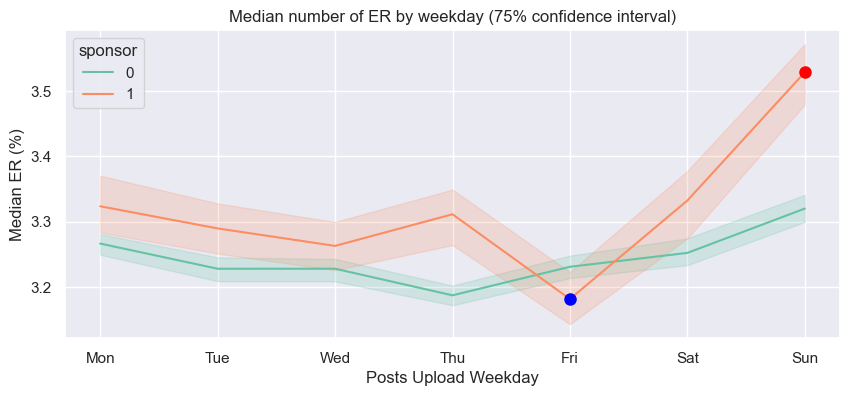

In [33]:
def plot_agg_simple(agg_name="Average", agg_function=np.mean, ci = 75):

    plt.figure(figsize=(10, 4))
    df_er = df.copy()
    df_er['ER'] = 100*df_er['ER']

    ax = sns.lineplot(data=df_er, x='weekday', y='ER', estimator=agg_function, errorbar=('ci', ci), color='#A788B5', hue='sponsor', palette="Set2")
    frame = df_er[df_er['sponsor']==1].groupby('weekday')['ER'].apply(agg_function)

    plt.plot(frame.argmax()+1, frame.max(), color='red', markersize=8, marker='o')
    plt.plot(frame.argmin()+1, frame.min(), color='blue', markersize=8, marker='o')

    ax.set(xlabel='Posts Upload Weekday',
       ylabel=f'{agg_name} ER (%)',
       title=f'{agg_name} number of ER by weekday ({ci}% confidence interval)',
       xticks = range(1, 8),
       xticklabels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    )
    # plt.savefig(f"viz/{agg_name}_ER_weekday.png", format="png")
    plt.show()

plot_agg_simple(agg_name="Average", agg_function=np.mean, ci=75)
plot_agg_simple(agg_name="Median", agg_function=np.median, ci=75)

In [34]:
def categorize_hour(hour):
  """
  This function takes an hour value and returns the corresponding category.
  """
  if hour in range(0,3):
    return '0-3'
  elif hour in range(3,6):
    return '3-6'
  elif hour in range(6,9):
    return '6-9'
  elif hour in range(9,12):
    return '9-12'
  elif hour in range(12,15):
    return '12-15'
  elif hour in range(15,18):
    return '15-18'
  elif hour in range(18,21):
    return '18-21'
  else:
    return '21-24'

df['hour_category'] = df['hour'].apply(categorize_hour)

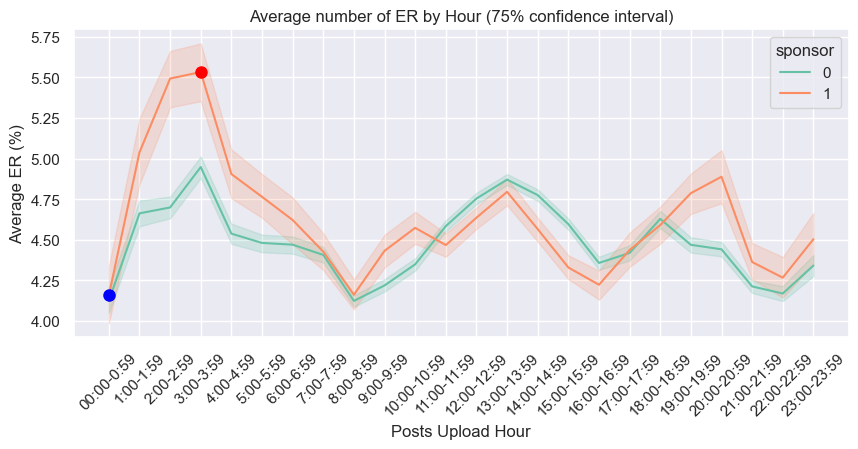

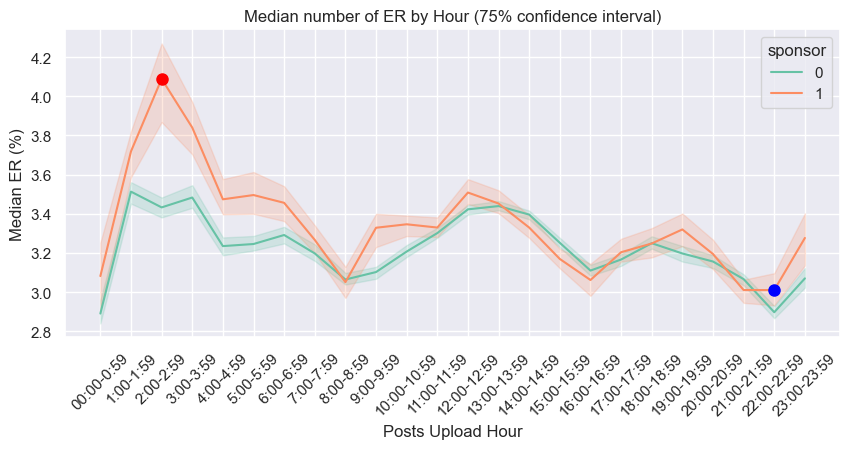

In [35]:
def plot_agg_simple(agg_name="Average", agg_function=np.mean, ci = 75):
    plt.figure(figsize=(10, 4))
    df_er = df.copy()
    df_er['ER'] = 100*df_er['ER']

    ax = sns.lineplot(data=df_er, x='hour', y='ER', estimator=agg_function, errorbar=('ci', ci), color='#A788B5', hue='sponsor', palette="Set2")
    frame = df_er[df_er['sponsor']==1].groupby('hour')['ER'].apply(agg_function)

    plt.plot(frame.argmax(), frame.max(), color='red', markersize=8, marker='o')
    plt.plot(frame.argmin(), frame.min(), color='blue', markersize=8, marker='o')

    ax.set(xlabel='Posts Upload Hour',
       ylabel=f'{agg_name} ER (%)',
       title=f'{agg_name} number of ER by Hour ({ci}% confidence interval)',
       xticks = range(24),
       xticklabels = ['00:00-0:59', '1:00-1:59', '2:00-2:59', '3:00-3:59', '4:00-4:59', '5:00-5:59', '6:00-6:59',
                       '7:00-7:59', '8:00-8:59', '9:00-9:59', '10:00-10:59', '11:00-11:59', '12:00-12:59', 
                       '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59', '18:00-18:59', 
                       '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
    )
    plt.xticks(rotation=45)
    
   #  plt.savefig(f"viz/{agg_name}_ER_hour.png", format="png")
    plt.show()

plot_agg_simple(agg_name="Average", agg_function=np.mean, ci=75)
plot_agg_simple(agg_name="Median", agg_function=np.median, ci=75)

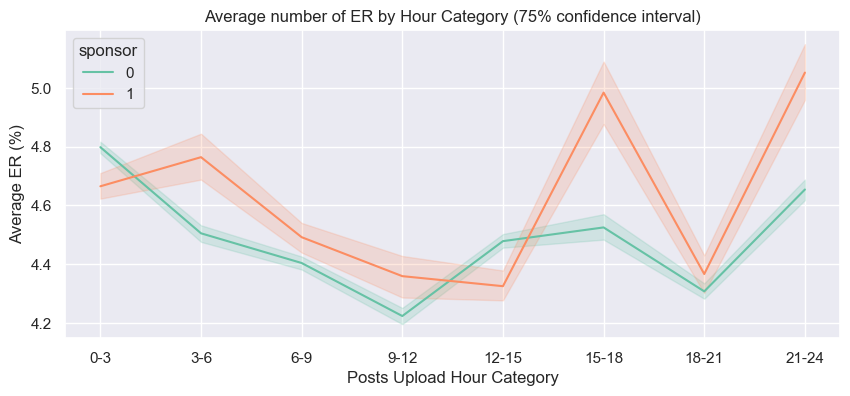

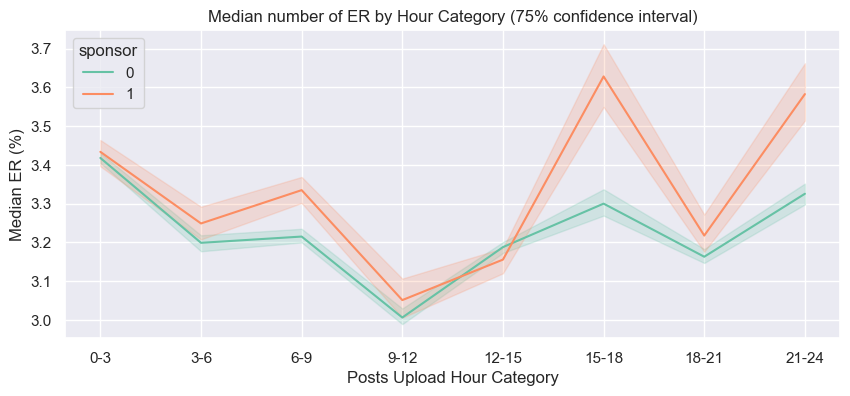

In [36]:
def plot_agg_simple(agg_name="Average", agg_function=np.mean, ci = 75):

    plt.figure(figsize=(10, 4))
    df_er = df.copy()
    df_er['ER'] = 100*df_er['ER']

    ax = sns.lineplot(data=df_er, x='hour_category', y='ER', estimator=agg_function, errorbar=('ci', ci), color='#A788B5', hue='sponsor', palette="Set2")
    # frame = df_er[df_er['sponsor']==1].groupby('hour_category')['ER'].apply(agg_function)

    # plt.plot(frame.argmax()+1, frame.max(), color='red', markersize=8, marker='o')
    # plt.plot(frame.argmin()+1, frame.min(), color='blue', markersize=8, marker='o')

    ax.set(xlabel='Posts Upload Hour Category',
       ylabel=f'{agg_name} ER (%)',
       title=f'{agg_name} number of ER by Hour Category ({ci}% confidence interval)',
       xticks = range(8),
       xticklabels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
    )

    plt.show()

plot_agg_simple(agg_name="Average", agg_function=np.mean, ci=75)
plot_agg_simple(agg_name="Median", agg_function=np.median, ci=75)

In [37]:
def working_hours(row):
  """
  This function takes a row of the DataFrame and returns "working_hour" or "non_working_hour" based on weekday and hour.
  """
  if (row['weekday'] in range(1, 6)) & (8 <= row['hour'] < 18):
    return 'working_hour'
  else:
    return 'non_working_hour'

df['working_hour_status'] = df.apply(working_hours, axis=1)

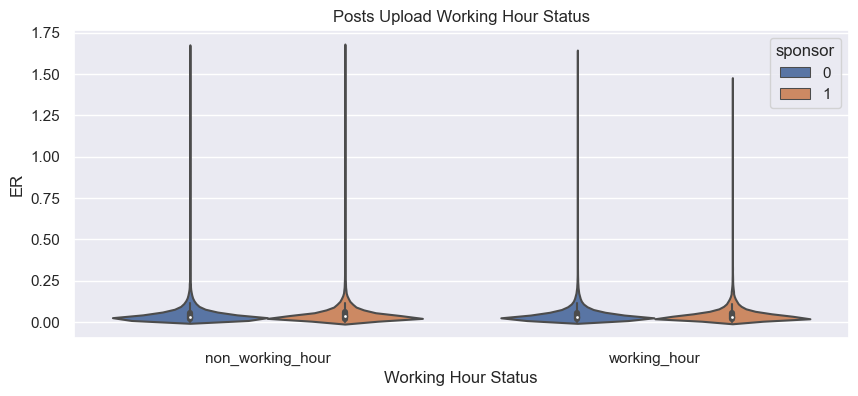

In [38]:
plt.figure(figsize=(10, 4))

ax = sns.violinplot(data=df, x='working_hour_status', y='ER', hue='sponsor')
    
ax.set(xlabel='Working Hour Status',
    ylabel='ER',
    title='Posts Upload Working Hour Status'
)

# plt.savefig(f"viz/ER_working_hour_status.png", format="png")
plt.show()

### Calculate the weight of this imbalanced data

In [39]:
rag = 1.5*iqr(df['ER'])
upper_bound = np.quantile(df['ER'], 0.75)+rag
n_outlier = df[df['ER']>np.quantile(df['ER'], 0.75)+rag].shape[0]
n_inlier = df[df['ER']<np.quantile(df['ER'], 0.75)+rag].shape[0]

print('upper bound:', upper_bound)
print('number of data points>upper bound:', n_outlier)
print('number of data points<upper bound:', n_inlier)

inliers = df[df['ER'] <= upper_bound]
outliers = df[df['ER'] > upper_bound]

df.loc[inliers.index, 'weight'] = 1 / n_inlier
df.loc[outliers.index, 'weight'] = 1 / n_outlier

upper bound: 0.11203435028218683
number of data points>upper bound: 25244
number of data points<upper bound: 367600


In [40]:
df.to_csv('post_time_features.csv', lineterminator = "\r\n", index = False)